# Tuberculosis

Tuberculosis (TB) is caused by bacteria (<a href="http://en.wikipedia.org/wiki/Mycobacterium_tuberculosis">Mycobacterium tuberculosis</a>) that most often affect the lungs. Tuberculosis is a curable and preventable disease.

TB is a communicable disease that spread from person to person through the air. When people with lung TB cough, sneeze or spit, they propel the TB germs into the air. A person needs to inhale only a few of those germs to become infected.

About one-third of the world's population has latent TB, which means people have been infected by TB bacteria but are not (yet) ill with the disease and cannot transmit the disease. People infected with TB bacteria have a lifetime risk of 10% of falling ill with TB. However persons with compromised immune systems, such as people living with HIV, malnutrition or diabetes, or people who use tobacco, have a much higher risk of falling ill.

### The World TB day

World TB Day, observed on March 24, marks the day in 1882 when <a href="http://en.wikipedia.org/wiki/Robert_Koch">Dr. Robert Koch</a> announced that he had discovered the bacterium that causes tuberculosis (TB). The discovery set the stage for successful diagnosis and treatment of the disease.The theme of the World TB Day 2015 was announced by Stop TB Partnership as "Reach the 3 Million: Reach, Treat, Cure Everyone".   

On World TB Day, we want 1) to raise awareness about the burden of TB worldwide and the status of TB prevention and control efforts; and 2) to call for global, national and local efforts to continue the commitment to find, treat and cure all people with TB and accelerate progress towards the bold goal of ending TB by 2035.

## Data

The Data source is: http://www.who.int/tb/country/data/download/en/

Description of the data, The dataset contains names of each country together with the region of which they belong. Each country has records of estimates of Tuberculosis incidences per 100k of the population, TB incidences of people who are reportedly HIV positive and HIV negative as well as deaths of the respective incidences and total deaths per 100k of the population.

## Problem

- Exploratory Data Analysis to explore the burden of TB worldwide, by region and country and learn about the level and distribution of key metrics and measures of TB surveillance, such as incidence, prevalence and mortality rates.  

In [8]:
# importing the necessary libaries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Lets bring in the data
filepath = "E:\Studies\MakeOverMonday\TB burden by country\TB_Burden_Country.csv"
data = pd.read_csv(filepath)
data.head()

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,Unnamed: 8,Unnamed: 9,...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,Unnamed: 38,Unnamed: 39,Estimated incidence of TB cases who are HIV-positive,Unnamed: 41,Unnamed: 42,Method to derive TBHIV estimates,"Case detection rate (all forms), percent",Unnamed: 45,Unnamed: 46
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,NaN,NaN,...,0.11,NaN,NaN,12.0,NaN,NaN,NaN,20.0,NaN,NaN
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,NaN,NaN,...,0.13,NaN,NaN,17.0,NaN,NaN,NaN,96.0,NaN,NaN
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,NaN,NaN,...,0.16,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,NaN,NaN,...,0.19,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,NaN,NaN,...,0.21,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN


- Lets examine it, by determining the following;
1. Number of rows and columns.
2. Column names.
3. The datatypes (may it be unique) of each column.
4. Presence of missing values.
5. Presence of null values.
6. General information of the dataset.

In [4]:
#Print the number of rows and columns in a dataset
print('Number of records: {}    Number of features: {}'.format(data.shape[0],
                                                                data.shape[1]))
print('\n')
#Check for presence of missing values - NANs if any
print('Do missing values exist in any feature? :', data.isnull().values.any())
print('\n')
#Print all the unique datatypes in all columns in the dataset
print('Unique data types of features: \n\n',data.dtypes.unique())
print('\n')
#does the dataset have null values
print('Are there any missing values:', data.isnull().values.any())
print('\n')
#non-null count, dtypes with column name of each column
print('General information of the dataset: \n\n')
data.info()

Number of records: 5120    Number of features: 47


Do missing values exist in any feature? : True


Unique data types of features: 

 [dtype('O') dtype('int64') dtype('float64')]


Are there any missing values: True


General information of the dataset: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 47 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country or territory name                                                          5120 non-null   object 
 1   ISO 2-character country/territory code                                             5096 non-null   object 
 2   ISO 3-character country/territory code                                             5120 non-null   object 
 3   ISO numeric country/territory code                                    

- Lets take a look at the statistical summary of the dataset ie, central tendency (mean, median and mode), dispersion(standard deviation and range)

In [5]:
data_stats = data.describe().T
data_stats.rename({'50%': 'median'}, inplace=True, axis= 1)
data_stats.dropna()

,count,mean,std,min,25%,median,75%,max
ISO numeric country/territory code,5120.0,4.335766e+02,2.551160e+02,4.00,212.00,430.00,6.460000e+02,8.940000e+02
Year,5120.0,2.001549e+03,6.933272e+00,1990.00,1996.00,2002.00,2.008000e+03,2.013000e+03
Estimated total population number,5120.0,2.915671e+07,1.183725e+08,1129.00,560119.00,5172117.50,1.752404e+07,1.385567e+09
Estimated prevalence of TB (all forms) per 100 000 population,5120.0,1.943861e+02,2.590164e+02,0.00,23.00,85.00,2.720000e+02,1.762000e+03
Unnamed: 8,4500.0,1.049115e+02,1.461594e+02,0.27,11.00,44.00,1.430000e+02,1.316000e+03
Unnamed: 9,4500.0,3.270070e+02,4.107435e+02,1.80,47.00,157.00,4.530000e+02,3.027000e+03
Estimated prevalence of TB (all forms),5120.0,6.654332e+04,3.249488e+05,0.00,380.00,4300.00,2.700000e+04,4.600000e+06
Unnamed: 11,4500.0,4.981323e+04,2.876820e+05,0.02,190.00,2400.00,1.400000e+04,4.000000e+06
Unnamed: 12,4500.0,9.712033e+04,4.126080e+05,0.16,847.50,9100.00,4.600000e+04,5.200000e+06
"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population",5120.0,2.017443e+01,3.289380e+01,0.00,1.30,5.40,2.500000e+01,2.780000e+02


## Observations

- The minimum estimated prevalence of TB (all forms) per 100 000 population is 23.0 while the maximum estimated prevalence of TB (all forms) per 100 000 population is 1762.0
- 
- Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population is at a minimum of 1.3 and at maximum of 278.0
- Estimated number of deaths from TB (all forms, excluding HIV)	per 100 000 population is at a minimum of 18.0 and at a maximum of 420 000.0
- Estimated mortality of TB cases who are HIV-positive, per 100 000 population is at a maximum of 481.0
- Estimated number of deaths from TB in people who are HIV-positive is at a maximum of 96 000
- Estimated HIV in incident TB (percent) is at a minimum of 0.64 percent and a maximum of 8.3 percent
- Estimated incidence of TB cases who are HIV-positive per 100 000 population is at a minimum of 0.19  and at a maximum of 1063.0
- The case detection rate (all forms), percent is at a minimum of 52 percent which is not the worst scenario.

 ### Lets see how TB incidences look over the time period, are the incidents on an increase or decrease?

In [6]:
#create a dataframe for the columns year through estimated prevalence
dataset = data.loc[:, 'Year':'Estimated prevalence of TB (all forms) per 100 000 population']
dataset.drop(dataset.columns[[1]], axis=1, inplace=True)
dataset

,Year,Estimated prevalence of TB (all forms) per 100 000 population
0,1990,306.0
1,1991,343.0
2,1992,371.0
3,1993,392.0
4,1994,410.0
...,...,...
5115,2009,449.0
5116,2010,415.0
5117,2011,417.0
5118,2012,425.0


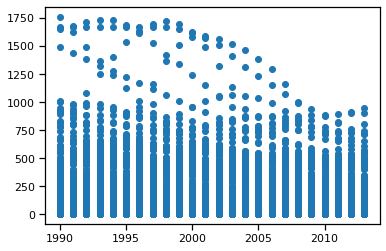

In [20]:
plt.scatter(x = dataset['Year'], y = dataset['Estimated prevalence of TB (all forms) per 100 000 population'])

The number of incidences are on a decrease with 1990 having the highest number of reported incidences per 100k population.